In [1]:
from plot_state_borders import plot_state_borders
import matplotlib.pyplot as plt
#from KNN import *
plt.style.use('fivethirtyeight') 

%matplotlib inline

In [29]:
cities = [  ([-122.3 , 47.53], "Python"), 
            ([ -96.85, 32.85], "Java"), # Austin
            ([ -89.33, 43.13], "R"), # Madison 
            ([ -118.33, 46.13], "Python"),
            ([ -125.31, 48.13], "Python"),
         ]
text_case = (-112.3 , 47.53)


[-122.3, -118.33, -125.31] [47.53, 46.13, 48.13]
[-89.33] [43.13]
[-96.85] [32.85]


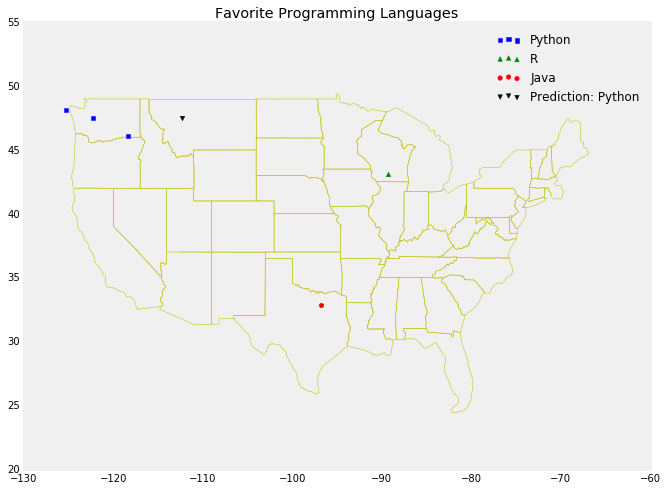

In [33]:
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

fig = plt.figure(1,figsize=(10, 8))
ax = fig.add_subplot(111)

for (longitude, latitude), language in cities: 
    plots[language][0].append(longitude) 
    plots[language][1].append(latitude)
    
# create a scatter series for each language
for language, (x, y) in plots.items():
    print(x,y)
    plt.scatter(x, y, color=colors[language], marker=markers[language],label=language, zorder=10)

plt.scatter(text_case[0],text_case[1],color = 'black', marker='v',label='Prediction: '+prediction)
plot_state_borders()
plt.legend(loc=0)
# pretend we have a function that does this
# let matplotlib choose the location
# set the axes
plt.axis([-130,-60,20,55])
plt.title("Favorite Programming Languages")
plt.show()

In [27]:
import numpy as np
from collections import Counter

def majority_vote(labels):
	"""assumes that labels are ordered from nearest to farthest"""
	vote_counts = Counter(labels)
	winner, winner_count = vote_counts.most_common(1)[0]

	num_winners = len([count for count in vote_counts.values() if count == winner_count ])

	#unique winner
	if num_winners == 1:
		return winner
	#try without farthest
	else:
		return majority_vote(labels[:-1])

def distance(point, new_point):
	temp = 0

	for (i,j) in zip (point,new_point):
		temp += (i-j)**2
	return np.sqrt(temp)

def knn_classify(K,labeled_points,new_point):
	"""each labeled point should be a pair (point, label)"""

	#order distance from closest to farthest
	by_distance = sorted(labeled_points, key = lambda x: distance(x[0],new_point))

	# find the labels for the k closest
	k_closest_labels = [label for _,label in by_distance[:K]]
	#print(k_closest_labels)
	#return the majority label
	return majority_vote(k_closest_labels)

In [31]:
text_case = (-112.3 , 47.53)
prediction = (knn_classify(2, cities,new_point=text_case)); prediction

'Python'